In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
import json

# rcParams
mpl.rcParams['axes.titlesize'] = 16.
mpl.rcParams['axes.titleweight'] = 'bold'

In [22]:
json_data = json.load(open('samplesVsSensitivity.json', 'r'))

sample_fracs = json_data['sample_fracs']
sens_2jet = np.array(json_data['sens_2jet'])
sens_3jet = np.array(json_data['sens_3jet'])
err_2jet = np.array(json_data['err_2jet']) * 0.5
err_3jet = np.array(json_data['err_3jet']) * 0.5

sens_total = np.add(sens_2jet ** 2, sens_3jet ** 2) ** 0.5
err_total = np.add(err_2jet ** 2, err_3jet ** 2) ** 0.5

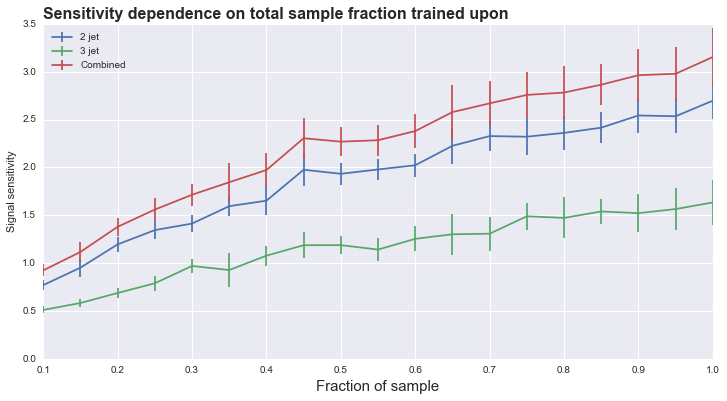

In [8]:
fig1, ax1 = plt.subplots(figsize=(12,6))

ax1.errorbar(sample_fracs, sens_2jet, yerr=err_2jet, marker="x", label='2 jet')
ax1.errorbar(sample_fracs, sens_3jet, yerr=err_3jet, marker="x", label='3 jet')
ax1.errorbar(sample_fracs, sens_total, yerr=err_total, marker="x", label='Combined')
plt.legend(loc='upper left');

# Titles
ax1.set_xlabel('Fraction of sample', size=15)
ax1.set_ylabel('Signal sensitivity')
ax1.set_title('Sensitivity dependence on total sample fraction trained upon', loc='left')

plt.savefig('sample_sensitivity_graph.png', transparent=True)
plt.show()

In [4]:
json_data_SB = json.load(open('samplesVsSensitivity_SB.json', 'r'))
json_data_SB.keys()

# These are the wrong way round.
sens_2jet_back_varied = json_data_SB['sens_2jet_signal_varied']
sens_3jet_back_varied = json_data_SB['sens_3jet_signal_varied']
err_2jet_back_varied = json_data_SB['err_2jet_signal_varied']
err_3jet_back_varied = json_data_SB['err_3jet_signal_varied']
sens_2jet_sig_varied = json_data_SB['sens_2jet_background_varied']
sens_3jet_sig_varied = json_data_SB['sens_3jet_background_varied']
err_2jet_sig_varied = json_data_SB['err_2jet_background_varied']
err_3jet_sig_varied = json_data_SB['err_3jet']

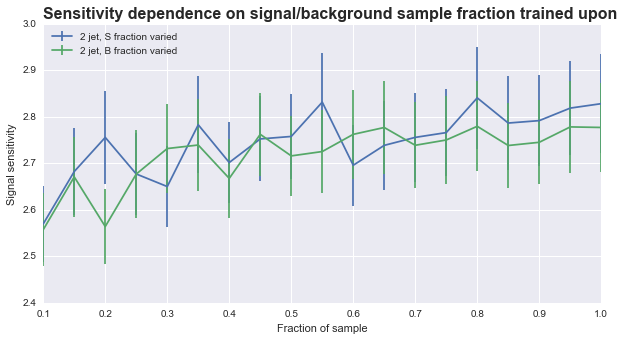

In [6]:
fig2, ax2 = plt.subplots(figsize=(10,5))

ax2.errorbar(sample_fracs, sens_2jet_sig_varied, yerr=err_2jet_sig_varied,
             marker="x", label='2 jet, S fraction varied')
# ax2.errorbar(sample_fracs, sens_3jet_sig_varied, yerr=err_3jet_sig_varied,
#              marker="x", label='3 jet, S fraction varied')
ax2.errorbar(sample_fracs, sens_2jet_back_varied, yerr=err_2jet_back_varied,
             marker="x", label='2 jet, B fraction varied')
# ax2.errorbar(sample_fracs, sens_3jet_back_varied, yerr=err_3jet_back_varied,
#              marker="x", label='3 jet, B fraction varied')
plt.legend(loc='upper left');

# Titles
ax2.set_xlabel('Fraction of sample')
ax2.set_ylabel('Signal sensitivity')
ax2.set_title('Sensitivity dependence on signal/background sample fraction trained upon', loc='left')

plt.show()

In [11]:
np.array([1,2,3])**2

array([1, 4, 9])

In [27]:
sample_2jet = map(lambda a: int(a*40280), sample_fracs)
sample_3jet = map(lambda a: int(a*128072), sample_fracs)

In [18]:
from ROOT import TFile, TGraph, TGraphErrors, TVectorD

n_2jet = len(sens_2jet)
n_3jet = len(sens_3jet)
n_total = len(sens_total)

In [14]:
fh = TFile('fractionOfSamples.root', 'RECREATE')

graph_2jet = TGraphErrors(sample_2jet,sens_2jet.tolist(),np.zeros(n_2jet).tolist(),err_2jet.tolist())
graph_3jet = TGraphErrors(n_3jet,sample_3jet,sens_3jet,np.zeros(n_3jet),err_3jet)

fh.Write()
fh.Close()

TypeError: none of the 9 overloaded methods succeeded. Full details:
  TGraphErrors::TGraphErrors() =>
    takes at most 0 arguments (4 given)
  TGraphErrors::TGraphErrors(Int_t n) =>
    takes at most 1 arguments (4 given)
  TGraphErrors::TGraphErrors(const TVectorF& vx, const TVectorF& vy, const TVectorF& vex, const TVectorF& vey) =>
    could not convert argument 1
  TGraphErrors::TGraphErrors(const TVectorD& vx, const TVectorD& vy, const TVectorD& vex, const TVectorD& vey) =>
    could not convert argument 1
  TGraphErrors::TGraphErrors(const TGraphErrors& gr) =>
    takes at most 1 arguments (4 given)
  TGraphErrors::TGraphErrors(const TH1* h) =>
    takes at most 1 arguments (4 given)
  TGraphErrors::TGraphErrors(const char* filename, const char* format = "%lg %lg %lg %lg", Option_t* option = "") =>
    takes at most 3 arguments (4 given)
  TGraphErrors::TGraphErrors(Int_t n, const Float_t* x, const Float_t* y, const Float_t* ex = 0, const Float_t* ey = 0) =>
    could not convert argument 1
  TGraphErrors::TGraphErrors(Int_t n, const Double_t* x, const Double_t* y, const Double_t* ex = 0, const Double_t* ey = 0) =>
    could not convert argument 1

In [19]:
test= TVectorD([2.2,2.2])

TypeError: none of the 10 overloaded methods succeeded. Full details:
  TVectorT<double>::TVectorT<double>() =>
    takes at most 0 arguments (1 given)
  TVectorT<double>::TVectorT<double>(Int_t n) =>
    could not convert argument 1
  TVectorT<double>::TVectorT<double>(Int_t lwb, Int_t upb) =>
    takes at least 2 arguments (1 given)
  TVectorT<double>::TVectorT<double>(const TVectorT<double>& another) =>
    could not convert argument 1
  TVectorT<double>::TVectorT<double>(const TMatrixTRow_const<double>& mr) =>
    could not convert argument 1
  TVectorT<double>::TVectorT<double>(const TMatrixTColumn_const<double>& mc) =>
    could not convert argument 1
  TVectorT<double>::TVectorT<double>(const TMatrixTDiag_const<double>& md) =>
    could not convert argument 1
  TVectorT<double>::TVectorT<double>(const TVectorT<float>& another) =>
    could not convert argument 1
  TVectorT<double>::TVectorT<double>(Int_t n, const double* elements) =>
    takes at least 2 arguments (1 given)
  TVectorT<double>::TVectorT<double>(Int_t lwb, Int_t upb, const double* elements) =>
    takes at least 3 arguments (1 given)

In [20]:
print n_2jet

19


In [32]:
print sample_2jet
print sens_2jet.tolist()
print np.zeros(19).tolist()
print err_2jet.tolist()

[4028, 6042, 8056, 10070, 12084, 14098, 16112, 18126, 20140, 22154, 24168, 26182, 28196, 30210, 32224, 34238, 36252, 38266, 40280]
[0.7704371794507713, 0.9528428495024703, 1.1962041762358893, 1.3455460417790266, 1.413768511450076, 1.5956772481390795, 1.6528026047202462, 1.9765102807506, 1.9340182411786702, 1.9793243031868386, 2.0235520465290895, 2.226592536816805, 2.3282009836924997, 2.321863700357458, 2.361811062419286, 2.416261694261757, 2.5438669267420098, 2.5354862288241, 2.6986546394322226]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0506522239508429, 0.09442011934790594, 0.07830686536056125, 0.08982545809187757, 0.0878105007794493, 0.09906132075272787, 0.14876653057681902, 0.16508506999412137, 0.1178812449716134, 0.11254599656321299, 0.11948359269662394, 0.1868909203866893, 0.15478072401048082, 0.19597860167210723, 0.17455198435508332, 0.16515705680960535, 0.18603043486473586, 0.17778003521411323, 0.1962710909011327]


In [34]:
print len(sample_3jet)
print sample_3jet
print sens_3jet.tolist()
print np.zeros(19).tolist()
print err_2jet.tolist()

19
[12807, 19210, 25614, 32018, 38421, 44825, 51228, 57632, 64036, 70439, 76843, 83246, 89650, 96054, 102457, 108861, 115264, 121668, 128072]
[0.510820703220854, 0.583238095855382, 0.6879938261595814, 0.7895143045197139, 0.9708052666139849, 0.927646777786159, 1.0784009974682307, 1.1873391547815808, 1.1884522997197686, 1.1418929291954631, 1.2544652818126196, 1.3015783474862996, 1.3077350533922125, 1.4898279870074786, 1.4729061837524418, 1.5404284535607302, 1.5226907920335686, 1.5654768821118517, 1.634416802196364]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0506522239508429, 0.09442011934790594, 0.07830686536056125, 0.08982545809187757, 0.0878105007794493, 0.09906132075272787, 0.14876653057681902, 0.16508506999412137, 0.1178812449716134, 0.11254599656321299, 0.11948359269662394, 0.1868909203866893, 0.15478072401048082, 0.19597860167210723, 0.17455198435508332, 0.16515705680960535, 0.18603043486473586, 0.17778003521411323, 0.19627109